<a href="https://colab.research.google.com/github/Vey27/Applied-Data-Science/blob/main/DrugAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#from ast import increment_lineno

%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')



In [62]:
#Read the dataset
df = pd.read_csv('pivot.csv')
df.head()

,Date,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
0,2019-09-01,2.00,4.360,5.00,17.000,8.2,1.0,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
1,2019-09-02,5.33,2.087,2.50,18.000,7.0,0.0,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2,2019-09-03,9.36,2.350,3.10,12.125,8.0,3.0,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
3,2019-09-04,2.00,0.373,2.15,29.230,7.0,0.0,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
4,2019-09-05,7.00,9.530,2.00,14.000,1.0,0.0,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


In [63]:
df.tail

<bound method NDFrame.tail of           Date  Drug1  Drug2  Drug3   Drug4  Drug5  Drug6      Drug7  Drug8  \
0   2019-09-01   2.00  4.360   5.00  17.000    8.2    1.0   5.000000    4.0   
1   2019-09-02   5.33  2.087   2.50  18.000    7.0    0.0   1.000000    9.0   
2   2019-09-03   9.36  2.350   3.10  12.125    8.0    3.0   1.000000    2.0   
3   2019-09-04   2.00  0.373   2.15  29.230    7.0    0.0   3.000000    3.0   
4   2019-09-05   7.00  9.530   2.00  14.000    1.0    0.0   1.000000    8.0   
5   2019-09-06   1.68  2.670   1.00  28.400    7.0    0.0   0.000000    1.5   
6   2019-09-07   8.33  3.670   2.00  27.000   14.0    3.0   6.000000    2.0   
7   2019-09-08   7.01  6.087   3.00  26.000    7.0    0.0   3.000000    3.0   
8   2019-09-09   1.18  2.124   3.00  26.000    4.0    3.0   5.000000    2.0   
9   2019-09-10   8.66  6.680   4.20  22.000   17.0    0.0   1.000000    1.0   
10  2019-09-11   2.67  5.076   3.00  42.000    5.0    0.0   5.000000    2.5   
11  2019-09-12   2.33 

In [64]:
df.shape

(30, 17)

In [65]:
#set it as index
df['Date']=pd.to_datetime(df['Date'])
df.set_index(['Date'], inplace = True)

In [66]:
df.head() #Date column now is index

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2019-09-01,2.00,4.360,5.00,17.000,8.2,1.0,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
2019-09-02,5.33,2.087,2.50,18.000,7.0,0.0,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2019-09-03,9.36,2.350,3.10,12.125,8.0,3.0,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
2019-09-04,2.00,0.373,2.15,29.230,7.0,0.0,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
2019-09-05,7.00,9.530,2.00,14.000,1.0,0.0,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


### Check for distribution and skewness using plots

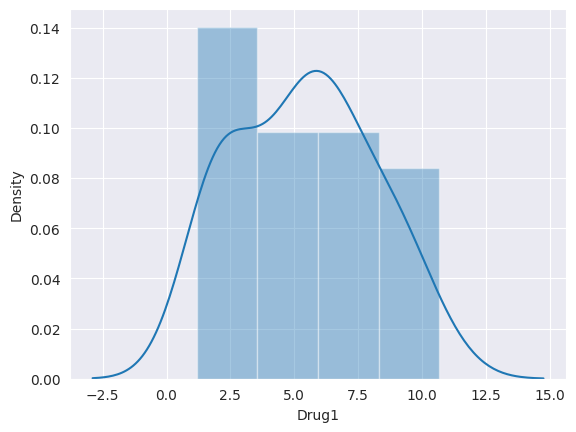

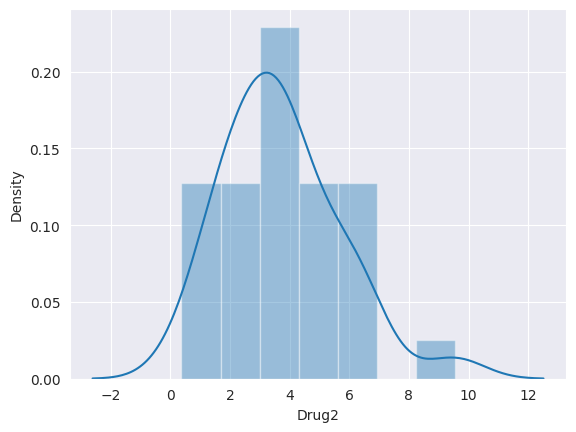

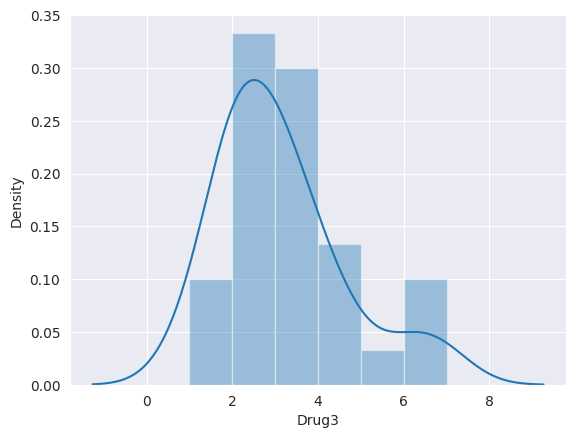

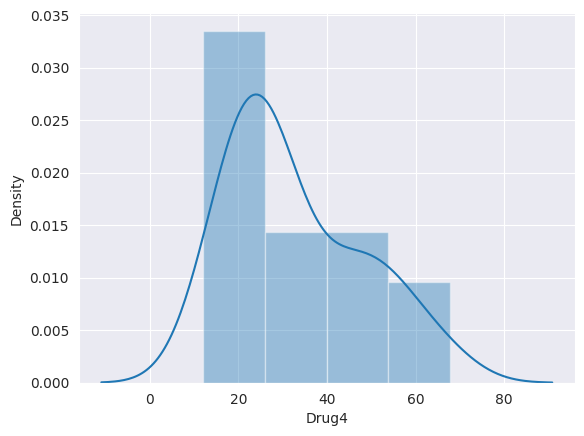

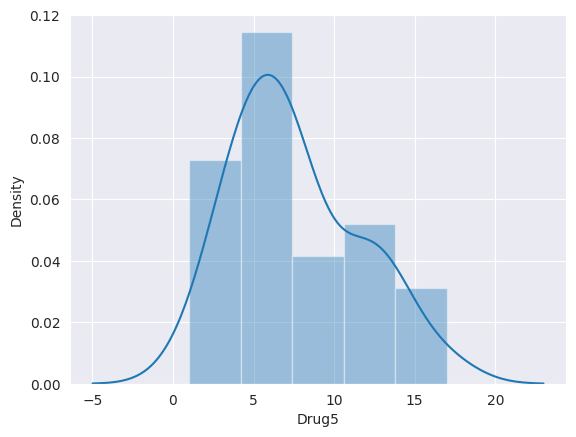

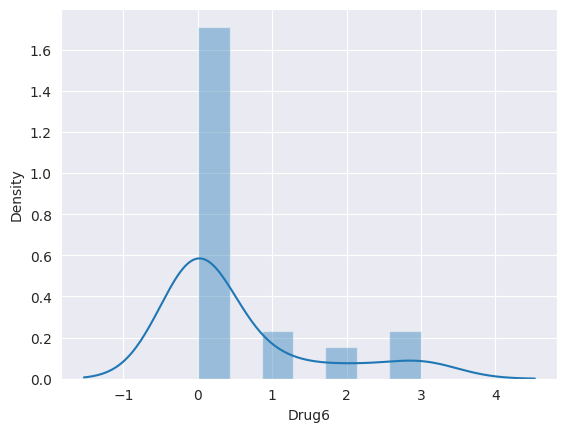

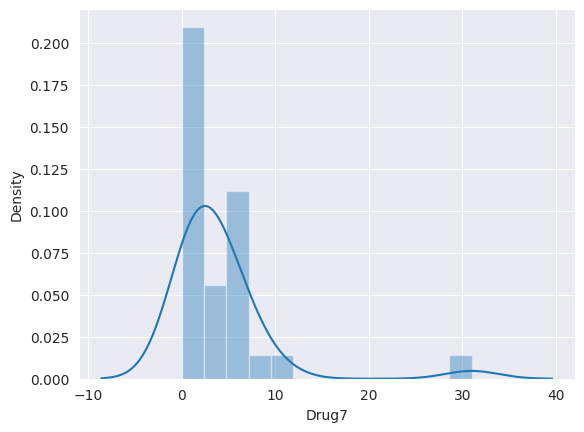

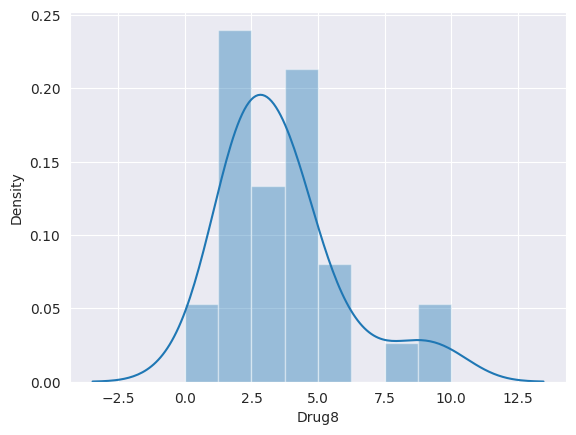

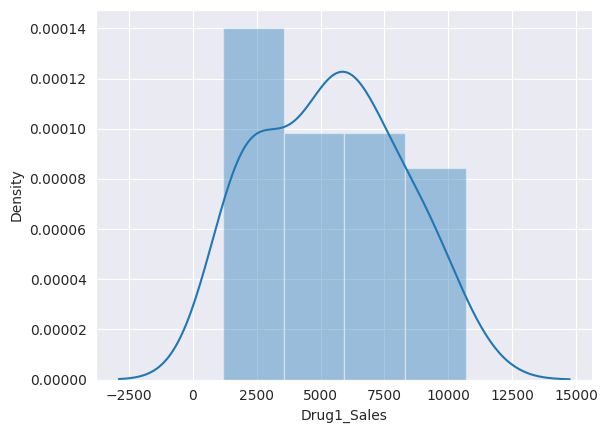

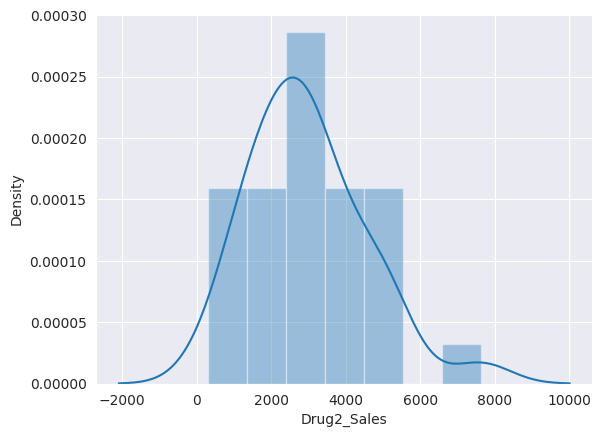

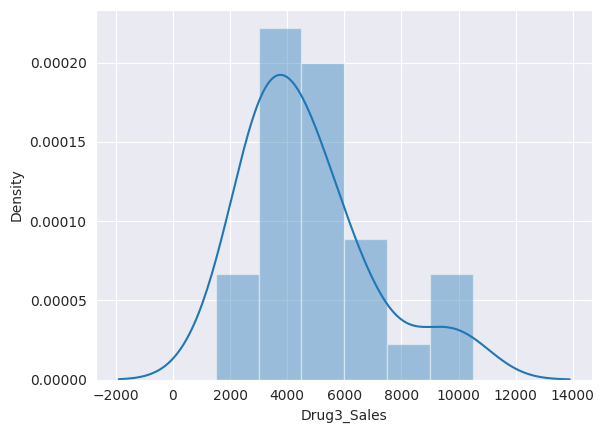

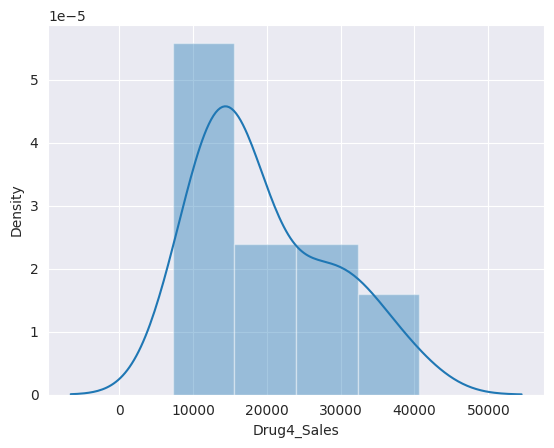

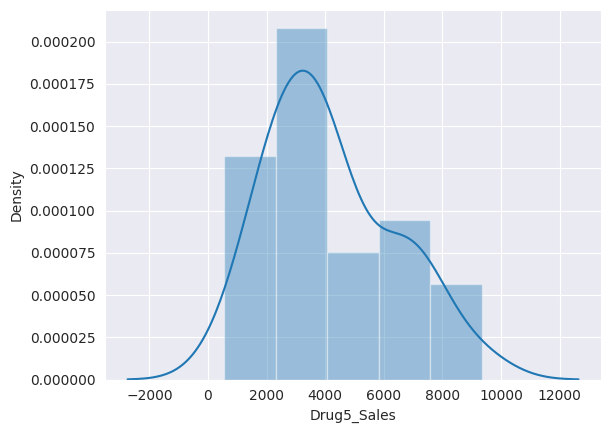

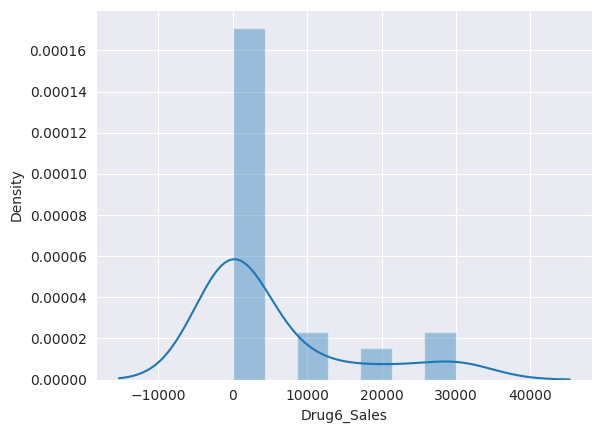

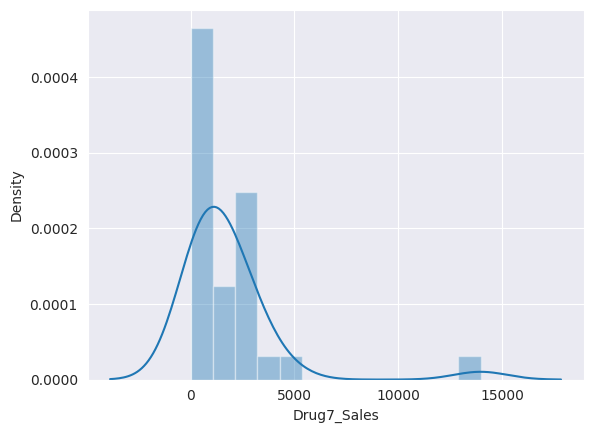

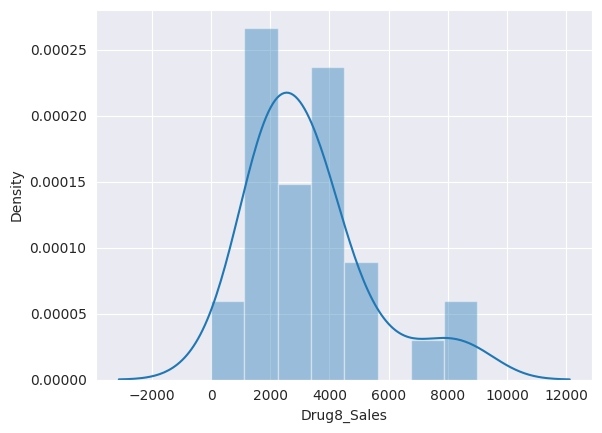

In [67]:
for col in df.columns:
  sns.distplot(df[col])
  plt.show()

Almost everything is distributed except for a for a few outliers. 

In [68]:
#describing the data
df.describe()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
count,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000
mean,5.36900,3.714567,3.116667,32.816000,7.593333,0.533333,4.047222,3.636667,5369.000000,2971.653333,4675.000000,19689.60000,4176.333333,5333.333333,1821.250000,3273.000000
std,2.68217,1.962529,1.488191,15.166121,3.941812,1.008014,5.658703,2.282993,2682.170184,1570.022885,2232.286596,9099.67288,2167.996824,10080.138660,2546.416409,2054.693785
min,1.18000,0.373000,1.000000,12.125000,1.000000,0.000000,0.000000,0.000000,1180.000000,298.400000,1500.000000,7275.00000,550.000000,0.000000,0.000000,0.000000
25%,2.83500,2.324500,2.000000,22.000000,5.000000,0.000000,1.000000,2.000000,2835.000000,1859.600000,3000.000000,13200.00000,2750.000000,0.000000,450.000000,1800.000000
50%,5.34000,3.366500,3.000000,27.700000,7.000000,0.000000,2.500000,3.000000,5340.000000,2693.200000,4500.000000,16620.00000,3850.000000,0.000000,1125.000000,2700.000000
75%,7.00750,4.501750,3.862500,43.687500,10.650000,0.750000,5.000000,4.000000,7007.500000,3601.400000,5793.750000,26212.50000,5857.500000,7500.000000,2250.000000,3600.000000
max,10.68000,9.530000,7.000000,67.800000,17.000000,3.000000,31.000000,10.000000,10680.000000,7624.000000,10500.000000,40680.00000,9350.000000,30000.000000,13950.000000,9000.000000


### Inference from the describe function:

From this df.described output, the four drug sold most amount of units and the least amount of unit. That were sold were of drug six. And even though drug six contributed to very low units, the sales generated by drug six was very high. 

1. Most number of units sold were of Drug4
2. Least number of units sold were of Drug6
3. Most sales happened with Drug4 while Drug2 contributed the least.
4. even though Drug6 sold a maz of 3 units, it generated 30000 worth revenue. Implying that the price of each drug is not same. 

In [69]:
import numpy as np

In [70]:
# check how much each drug cost
np.mean(df['Drug1_Sales']/df['Drug1'])

1000.0

#Weekly Analysis 

In [73]:
wdf = df.resample('W').mean()
wdf.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2019-09-01,2.000000,4.360000,5.000000,17.000000,8.200000,1.000000,5.000000,4.000000,2000.000000,3488.000000,7500.000000,10200.000000,4510.000000,10000.000000,2250.000000,3600.000000
2019-09-08,5.815714,3.823857,2.250000,22.107857,7.285714,0.857143,2.142857,4.071429,5815.714286,3059.085714,3375.000000,13264.714286,4007.142857,8571.428571,964.285714,3664.285714
2019-09-15,5.072857,4.425286,2.807143,25.482143,9.600000,0.714286,4.285714,4.357143,5072.857143,3540.228571,4210.714286,15289.285714,5280.000000,7142.857143,1928.571429,3921.428571
2019-09-22,6.691429,3.628000,3.485714,35.464286,4.457143,0.428571,3.714286,3.000000,6691.428571,2902.400000,5228.571429,21278.571429,2451.428571,4285.714286,1671.428571,2700.000000
2019-09-29,4.858571,3.214000,3.800000,48.100000,8.742857,0.142857,5.773810,3.300000,4858.571429,2571.200000,5700.000000,28860.000000,4808.571429,1428.571429,2598.214286,2970.000000


In [74]:
wdf.tail()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2019-09-08,5.815714,3.823857,2.250000,22.107857,7.285714,0.857143,2.142857,4.071429,5815.714286,3059.085714,3375.000000,13264.714286,4007.142857,8571.428571,964.285714,3664.285714
2019-09-15,5.072857,4.425286,2.807143,25.482143,9.600000,0.714286,4.285714,4.357143,5072.857143,3540.228571,4210.714286,15289.285714,5280.000000,7142.857143,1928.571429,3921.428571
2019-09-22,6.691429,3.628000,3.485714,35.464286,4.457143,0.428571,3.714286,3.000000,6691.428571,2902.400000,5228.571429,21278.571429,2451.428571,4285.714286,1671.428571,2700.000000
2019-09-29,4.858571,3.214000,3.800000,48.100000,8.742857,0.142857,5.773810,3.300000,4858.571429,2571.200000,5700.000000,28860.000000,4808.571429,1428.571429,2598.214286,2970.000000
2019-10-06,2.000000,1.439000,2.100000,49.400000,9.000000,0.000000,5.000000,2.000000,2000.000000,1151.200000,3150.000000,29640.000000,4950.000000,0.000000,2250.000000,1800.000000


In [75]:
wdf.describe()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,4.406429,3.481690,3.240476,32.925714,7.880952,0.523810,4.319444,3.454762,4406.428571,2785.352381,4860.714286,19755.428571,4334.523810,5238.095238,1943.750000,3109.285714
std,1.971683,1.099502,1.089829,13.668698,1.850883,0.400680,1.276431,0.876236,1971.682955,879.601850,1634.743942,8201.218891,1017.985773,4006.796946,574.393813,788.612188
min,2.000000,1.439000,2.100000,17.000000,4.457143,0.000000,2.142857,2.000000,2000.000000,1151.200000,3150.000000,10200.000000,2451.428571,0.000000,964.285714,1800.000000
25%,2.714643,3.317500,2.389286,22.951429,7.514286,0.214286,3.857143,3.075000,2714.642857,2654.000000,3583.928571,13770.857143,4132.857143,2142.857143,1735.714286,2767.500000
50%,4.965714,3.725929,3.146429,30.473214,8.471429,0.571429,4.642857,3.650000,4965.714286,2980.742857,4719.642857,18283.928571,4659.285714,5714.285714,2089.285714,3285.000000
75%,5.630000,4.225964,3.721429,44.941071,8.935714,0.821429,5.000000,4.053571,5630.000000,3380.771429,5582.142857,26964.642857,4914.642857,8214.285714,2250.000000,3648.214286
max,6.691429,4.425286,5.000000,49.400000,9.600000,1.000000,5.773810,4.357143,6691.428571,3540.228571,7500.000000,29640.000000,5280.000000,10000.000000,2598.214286,3921.428571


### Inferences from the describe funciton of weekly analysis
1. Drug4 tops the sales
2. Drug6 sold the least units
3. Drug7 performed the worst in terms of sales even if it sold close to 6 units. 

<BarContainer object of 6 artists>

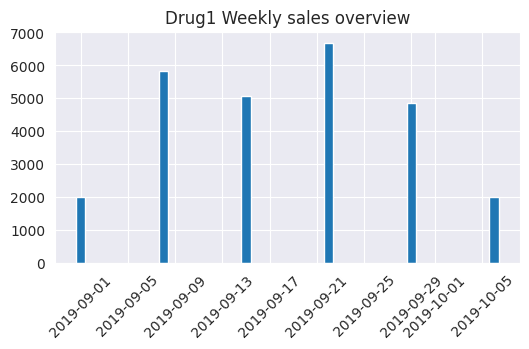

In [76]:
plt.figure(figsize=(6,3), dpi=100)
plt.tick_params(axis ='x', rotation = 45)
plt.title('Drug1 Weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug1_Sales)

### Inferences of Drug1 weekly sales:
1. Best week was from 17/09 to 21/09
2. Sales picked up gradually with hiccups, topped at 21/09 and then saw a decline.
3. First weekk and last week of september made almmost the same sales. **bold text**

<BarContainer object of 6 artists>

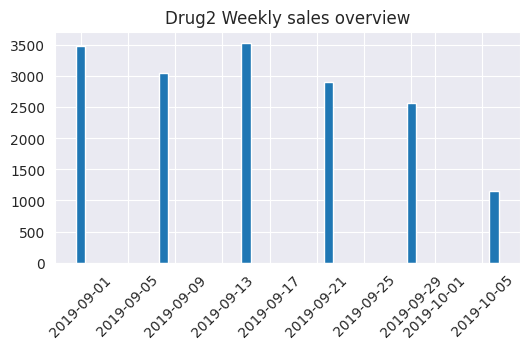

In [77]:
#Drug2 weekly sales overview
plt.figure(figsize=(6,3), dpi=100)
plt.tick_params(axis ='x', rotation = 45)
plt.title('Drug2 Weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug2_Sales)

<BarContainer object of 6 artists>

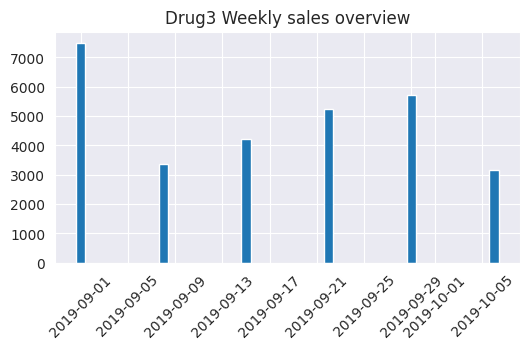

In [78]:
plt.figure(figsize=(6,3), dpi=100)
plt.tick_params(axis ='x', rotation = 45)
plt.title('Drug3 Weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug3_Sales)

<BarContainer object of 6 artists>

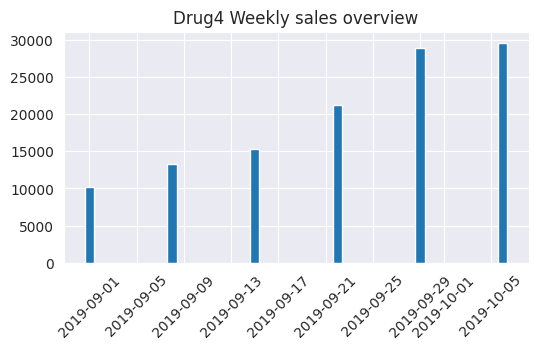

In [79]:
plt.figure(figsize=(6,3), dpi=100)
plt.tick_params(axis ='x', rotation = 45)
plt.title('Drug4 Weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug4_Sales)

<BarContainer object of 6 artists>

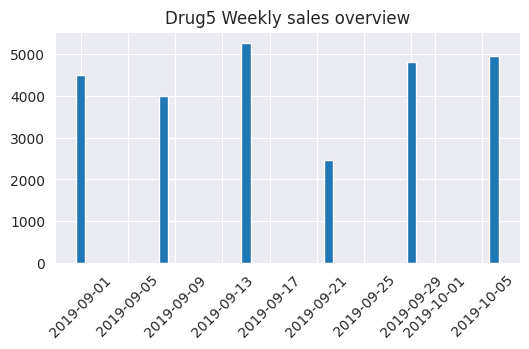

In [80]:
plt.figure(figsize=(6,3), dpi=100)
plt.tick_params(axis ='x', rotation = 45)
plt.title('Drug5 Weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug5_Sales)

<BarContainer object of 6 artists>

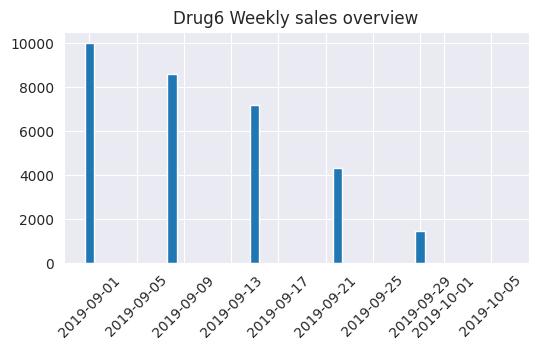

In [81]:
plt.figure(figsize=(6,3), dpi=100)
plt.tick_params(axis ='x', rotation = 45)
plt.title('Drug6 Weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug6_Sales)

<BarContainer object of 6 artists>

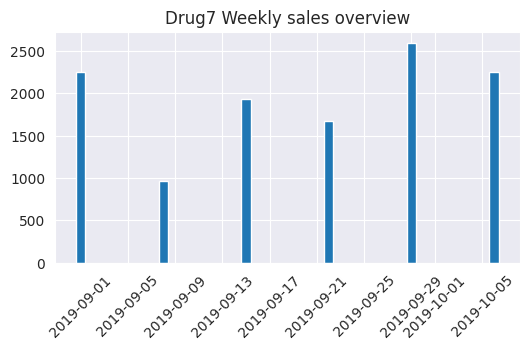

In [82]:
plt.figure(figsize=(6,3), dpi=100)
plt.tick_params(axis ='x', rotation = 45)
plt.title('Drug7 Weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug7_Sales)

<BarContainer object of 6 artists>

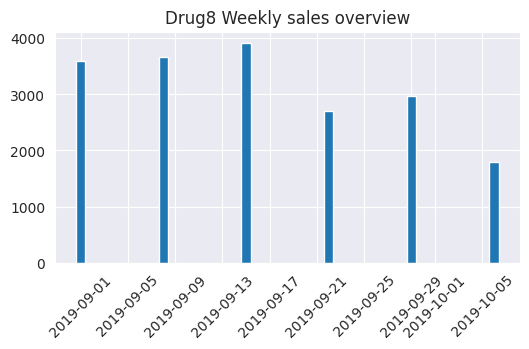

In [83]:
plt.figure(figsize=(6,3), dpi=100)
plt.tick_params(axis ='x', rotation = 45)
plt.title('Drug8 Weekly sales overview')
plt.bar(x = wdf.index, height = wdf.Drug8_Sales)

# Monthly Analysis

In [85]:
mdf = df. resample('M').mean()
mdf.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2019-09-30,5.369,3.714567,3.116667,32.816,7.593333,0.533333,4.047222,3.636667,5369.0,2971.653333,4675.0,19689.6,4176.333333,5333.333333,1821.25,3273.0


### Inferences
There's only one row because we only have the dates data of September
1. Drug4 top the units that were sold and gnerated the highest revenue.
2. Drug 6 only averaged out to sell close to one unit over the entire month, it was still able to generate a lot of sales owing to its unit price.
